In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [58]:
img = cv2.imread('kuma.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

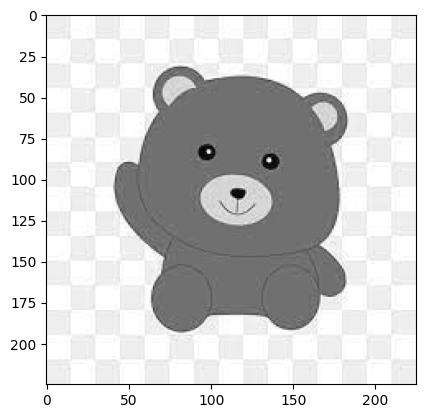

In [59]:
plt.imshow(img, cmap='gray')

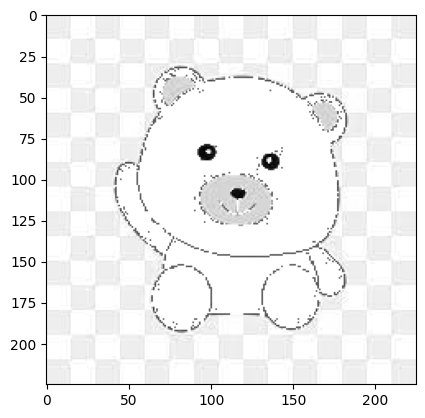

In [60]:
res = np.zeros_like(img, dtype='uint8')
trans_f = np.zeros(256, dtype='uint8')
for i in range(256):
    if (100 < i < 150): trans_f[i] = 255
    else: trans_f[i] = i
        
for i in range(len(img)):
    for j in range(len(img[i])):
        res[i,j] = trans_f[img[i,j]]
        
plt.imshow(res, cmap='gray')

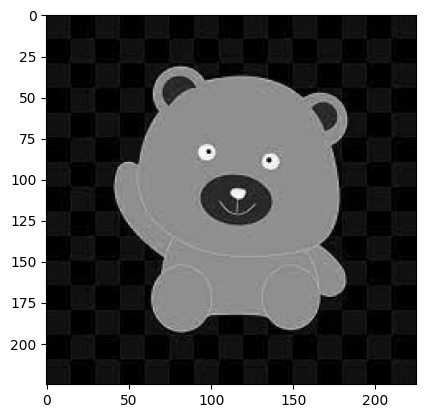

In [61]:
res = np.zeros_like(img, dtype='uint8')
trans_f = np.zeros(256, dtype='uint8')
for i in range(256):
    trans_f[i] = 255- i
        
for i in range(len(img)):
    for j in range(len(img[i])):
        res[i,j] = trans_f[img[i,j]]
        
plt.imshow(res, cmap='gray')

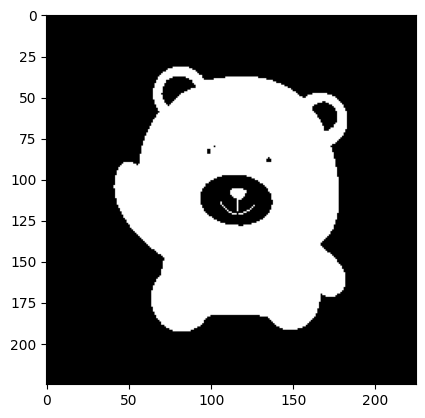

In [62]:
res = np.zeros_like(img, dtype='uint8')
trans_f = np.zeros(256, dtype='uint8')
for i in range(256):
    if (i < 150): trans_f[i] = 255
    else: trans_f[i] = 0
        
for i in range(len(img)):
    for j in range(len(img[i])):
        res[i,j] = trans_f[img[i,j]]
        
plt.imshow(res, cmap='gray')

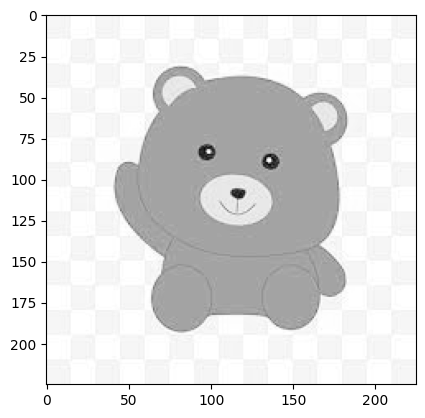

In [63]:
# gamma correction

res = np.zeros_like(img, dtype='uint8')
trans_f = np.zeros(256, dtype='uint8')

for i in range(256):
    trans_f[i] = 255*((i/255)**0.5)
        
for i in range(len(img)):
    for j in range(len(img[i])):
        res[i,j] = trans_f[img[i,j]]
        
plt.imshow(res, cmap='gray')

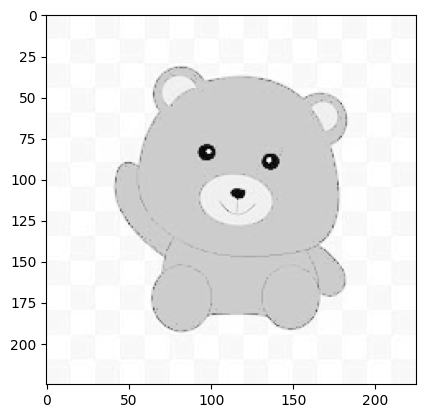

In [64]:
# contrast stretching (enhancing)
# (50, 50) , (100, 200)

res = np.zeros_like(img, dtype='uint8')
trans_f = np.zeros(256, dtype='uint8')

for i in range(256):
    if (i < 50): trans_f[i] = i
    elif 50 <= i < 100: trans_f[i] = 3*i + (50 - (3 * 50))
    else: trans_f[i] = (55/155)*i + (200 - (55/155)*100)
        
for i in range(len(img)):
    for j in range(len(img[i])):
        res[i,j] = trans_f[img[i,j]]
        
plt.imshow(res, cmap='gray')

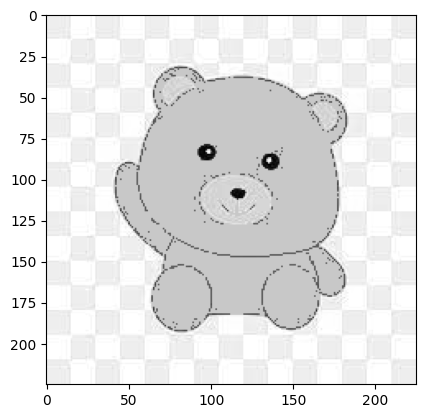

In [65]:
# Gray level slicing
# 100~200의 Gray Level을 200으로 고정
res = np.zeros_like(img, dtype='uint8')
trans_f = np.zeros(256, dtype='uint8')

for i in range(256):
    if 100 < i < 200: trans_f[i] = 200
    else: trans_f[i] = i
        
for i in range(len(img)):
    for j in range(len(img[i])):
        res[i,j] = trans_f[img[i,j]]
        
plt.imshow(res, cmap='gray')

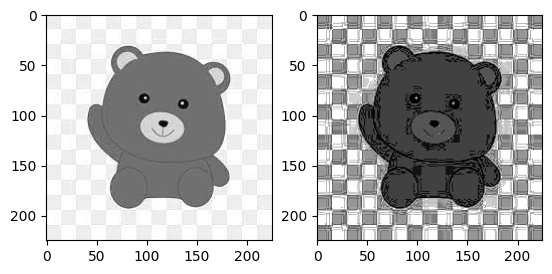

In [66]:
#histogram equalization

res = np.zeros_like(img, dtype='uint8')
trans_f = np.zeros(256, dtype='uint8')
count = np.zeros(256)

for i in range(len(img)):
    for j in range(len(img[i])):
        count[img[i, j]] += 1

for i in range(1, 256):
    count[i] += count[i-1]
    
for i in range(256):
    trans_f[i] = 255 * (count[i] / img.size)
    
for i in range(len(img)):
    for j in range(len(img[i])):
        res[i,j] = trans_f[img[i,j]]
f, ax = plt.subplots(1, 2)
ax[0].imshow(img, cmap='gray')
ax[1].imshow(res, cmap='gray')

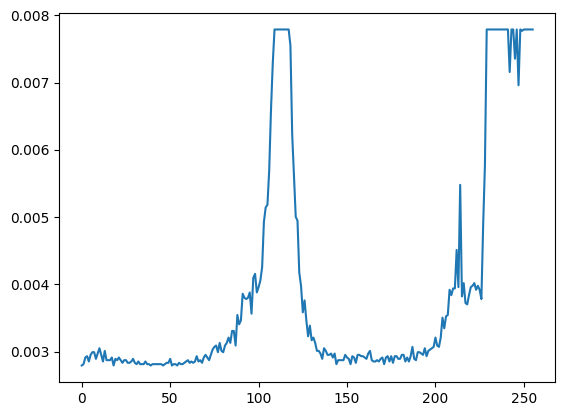

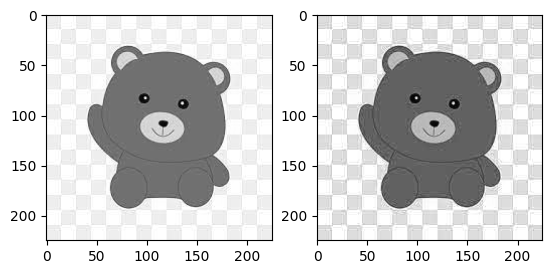

In [67]:
#CNLHE

res = np.zeros_like(img, dtype='uint8')
trans_f = np.zeros(256, dtype='uint8')
count = np.zeros(256)
n = 0

for i in range(len(img)):
    for j in range(len(img[i])):
        if 0.005 >= (count[img[i, j]] + (1/img.size)): count[img[i, j]] += 1 / img.size
        else: n += 1/img.size
            
count = count + (n/256)

plt.plot(count)

for i in range(1, 256):
    count[i] += count[i-1] 
    
for i in range(256):
    trans_f[i] = np.max(img)*count[i]

    
for i in range(len(img)):
    for j in range(len(img[i])):
        res[i,j] = trans_f[img[i,j]]
f, ax = plt.subplots(1, 2)
ax[0].imshow(img, cmap='gray')
ax[1].imshow(res, cmap='gray')

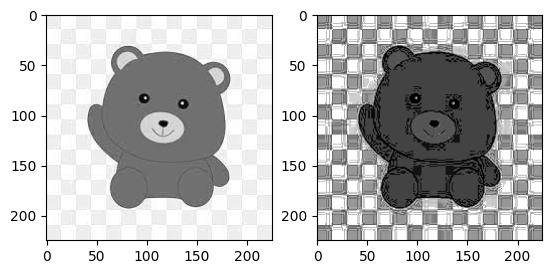

In [68]:
# 공용함수 사용

res = cv2.equalizeHist(img)

f, ax = plt.subplots(1,2)
ax[0].imshow(img, cmap='gray')
ax[1].imshow(res, cmap='gray')

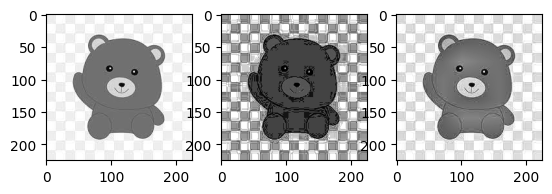

In [69]:
# 공용함수 사용

res = cv2.equalizeHist(img)
clahe = cv2.createCLAHE(clipLimit=2.0)
res_CLAHE = clahe.apply(img)

f, ax = plt.subplots(1,3)
ax[0].imshow(img, cmap='gray')
ax[1].imshow(res, cmap='gray')
ax[2].imshow(res_CLAHE, cmap='gray')

In [70]:

prewitt_h = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])
prewitt_v = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])

sobel_h = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
sobel_v = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])

res_p_v = cv2.filter2D(img_f,-1,prewitt_v)
res_p_h = cv2.filter2D(img_f,-1,prewitt_h)

res_s_v = cv2.filter2D(img_f,-1,sobel_v)
res_s_h = cv2.filter2D(img_f,-1,sobel_h)

res_p = np.sqrt(res_p_v**2 + res_p_h**2).astype('uint8')
res_s = np.sqrt(res_s_v**2 + res_s_h**2).astype('uint8')
print(res_p)
print(res_s)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Text(0.5, 1.0, 'sobel')

/Users/joseongjin/anaconda3/lib/python3.10/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/joseongjin/anaconda3/lib/python3.10/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 48376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/joseongjin/anaconda3/lib/python3.10/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/joseongjin/anaconda3/lib/python3.10/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 48376 missing from current font.
  font.set_text(s, 0, flags=flags)


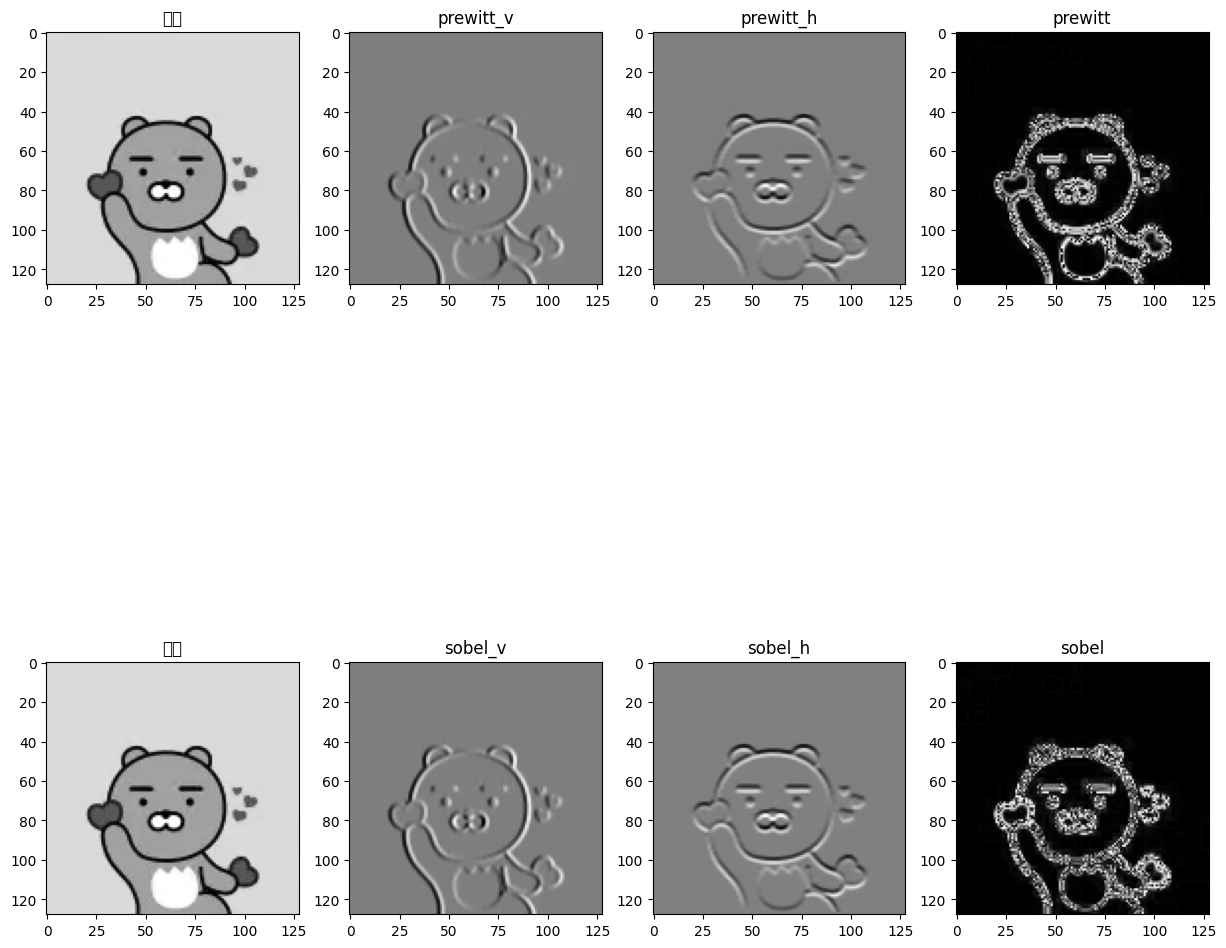

In [71]:
f, ax = plt.subplots(2,4)
f.set_size_inches(15,15)
ax[0][0].imshow(img_f,cmap='gray')
ax[0][0].set_title('원본')
ax[0][1].imshow(res_p_v,cmap='gray')
ax[0][1].set_title('prewitt_v')
ax[0][2].imshow(res_p_h,cmap='gray')
ax[0][2].set_title('prewitt_h')
ax[0][3].imshow(res_p,cmap='gray')
ax[0][3].set_title('prewitt')
ax[1][0].imshow(img_f,cmap='gray')
ax[1][0].set_title('원본')
ax[1][1].imshow(res_s_v,cmap='gray')
ax[1][1].set_title('sobel_v')
ax[1][2].imshow(res_s_h,cmap='gray')
ax[1][2].set_title('sobel_h')
ax[1][3].imshow(res_s,cmap='gray')
ax[1][3].set_title('sobel')

In [72]:

prewitt_h = np.array([[-1,-1,-1],[0,0,0],[1,1,1]], dtype=float)
prewitt_v = np.array([[-1,0,1],[-1,0,1],[-1,0,1]], dtype=float)

sobel_h = np.array([[-1,-2,-1],[0,0,0],[1,2,1]], dtype=float)
sobel_v = np.array([[-1,0,1],[-2,0,2],[-1,0,1]], dtype=float)

res_p_v = cv2.filter2D(img_f,-1,prewitt_v)
res_p_h = cv2.filter2D(img_f,-1,prewitt_h)

res_s_v = cv2.filter2D(img_f,-1,sobel_v)
res_s_h = cv2.filter2D(img_f,-1,sobel_h)

res_p = np.sqrt(res_p_v**2 + res_p_h**2)
res_s = np.sqrt(res_s_v**2 + res_s_h**2)

th = 50
for i in range(len(img_f)):
    for j in range(len(img_f)):
        if res_p[i,j] > th: res_p[i,j] = 255
        else: res_p[i,j] = 0
        if res_s[i,j] > th: res_s[i,j] = 255
        else: res_s[i,j] = 0

Text(0.5, 1.0, 'sobel')

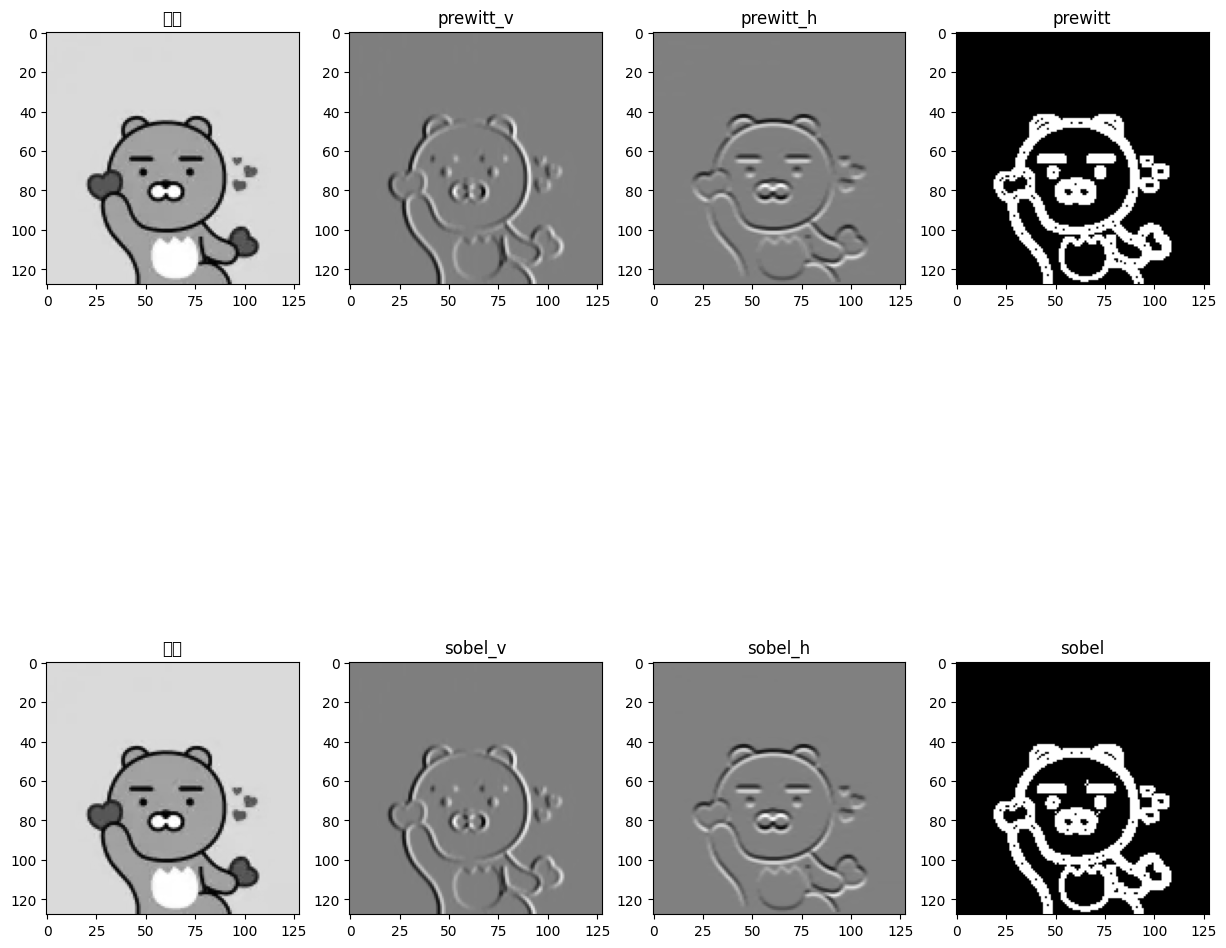

In [73]:
f, ax = plt.subplots(2,4)
f.set_size_inches(15,15)
ax[0][0].imshow(img_f,cmap='gray')
ax[0][0].set_title('원본')
ax[0][1].imshow(res_p_v,cmap='gray')
ax[0][1].set_title('prewitt_v')
ax[0][2].imshow(res_p_h,cmap='gray')
ax[0][2].set_title('prewitt_h')
ax[0][3].imshow(res_p,cmap='gray')
ax[0][3].set_title('prewitt')
ax[1][0].imshow(img_f,cmap='gray')
ax[1][0].set_title('원본')
ax[1][1].imshow(res_s_v,cmap='gray')
ax[1][1].set_title('sobel_v')
ax[1][2].imshow(res_s_h,cmap='gray')
ax[1][2].set_title('sobel_h')
ax[1][3].imshow(res_s,cmap='gray')
ax[1][3].set_title('sobel')

112.5
(225, 225)
(112, 112)


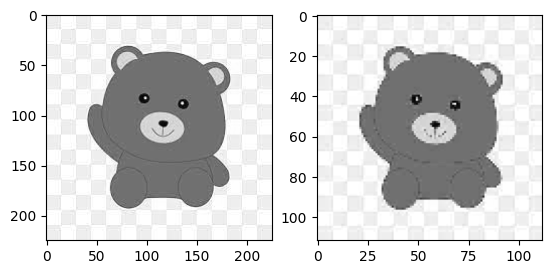

In [78]:
# image resizing (사이즈 줄이기)
height, width = img.shape

scale = 0.5
print(round(scale * height, 1))
re_height = int(np.round(scale * height))
re_width = int(np.round(scale * width))
res = np.zeros((re_height, re_width), dtype='uint8')
for i in range(re_height):
    for j in range(re_width):
        pi = int(np.floor(i / scale))
        pj = int(np.floor(j / scale))
        res[i,j] = img[pi,pj]
        
print(img.shape)
print(res.shape)
f, ax = plt.subplots(1,2)
ax[0].imshow(img, cmap='gray')
ax[1].imshow(res, cmap='gray')

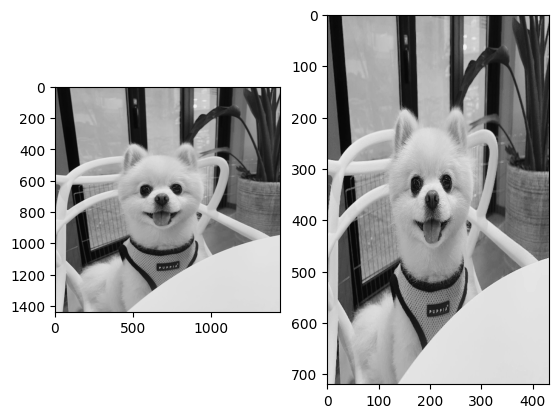

In [20]:
# image resizing (사이즈 줄이기)
height, width = img.shape

scale_x, scale_y = 0.3, 0.5
re_height = int(scale_y * height)
re_width = int(scale_x * width)
res = np.zeros((re_height, re_width), dtype='uint8')
for i in range(re_height):
    for j in range(re_width):
        pi = int(np.round(i / scale_y))
        pj = int(np.round(j / scale_x))
        res[i,j] = img[pi,pj]
        
f, ax = plt.subplots(1,2)
ax[0].imshow(img, cmap='gray')
ax[1].imshow(res, cmap='gray')

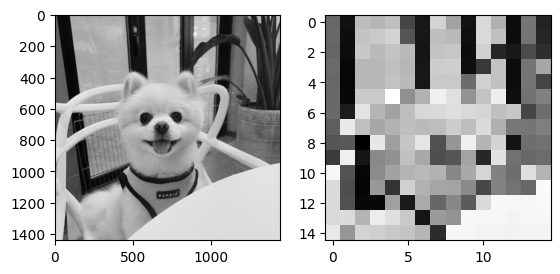

In [21]:
# image resizing (사이즈 줄이기)
height, width = img.shape

scale = 0.011
re_height = int(scale * height)
re_width = int(scale * width)
res = np.zeros((re_height, re_width), dtype='uint8')
for i in range(re_height):
    for j in range(re_width):
        pi = int(np.floor(i / scale))
        pj = int(np.floor(j / scale))
        res[i,j] = img[pi,pj]
        
f, ax = plt.subplots(1,2)
ax[0].imshow(img, cmap='gray')
ax[1].imshow(res, cmap='gray')

In [22]:
# image resizing (사이즈 줄이기)
height, width = ds_img.shape

scale = 2
re_height = int(scale * height)
re_width = int(scale * width)
res = np.zeros((re_height, re_width), dtype='uint8')
for i in range(re_height):
    for j in range(re_width):
        pi = int(np.floor(i / scale))
        pj = int(np.floor(j / scale))
        res[i,j] = ds_img[pi,pj]
        
f, ax = plt.subplots(1,2)
ax[0].imshow(ds_img, cmap='gray')
ax[1].imshow(res, cmap='gray')

NameError: name 'ds_img' is not defined

0.0
2
